(150, 5) Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
<class 'sklearn.linear_model._logistic.LogisticRegression'>
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



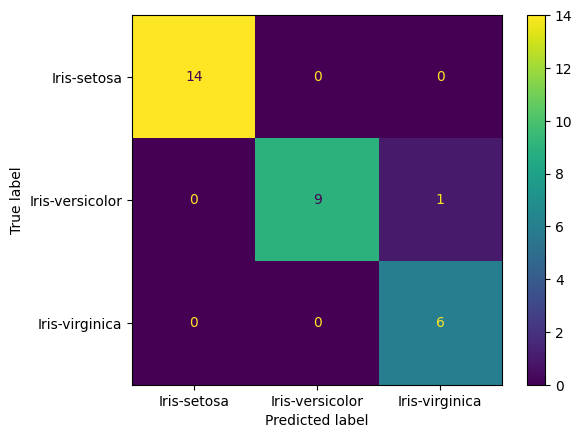

<class 'sklearn.svm._classes.SVC'>
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.83      0.83      0.83         6

       accuracy                           0.93        30
      macro avg       0.91      0.91      0.91        30
   weighted avg       0.93      0.93      0.93        30



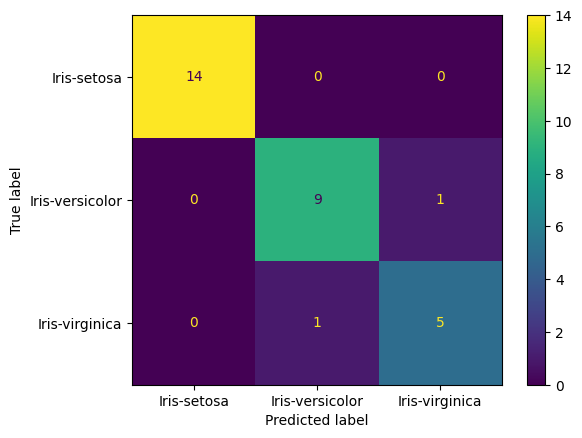

<class 'sklearn.naive_bayes.GaussianNB'>
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



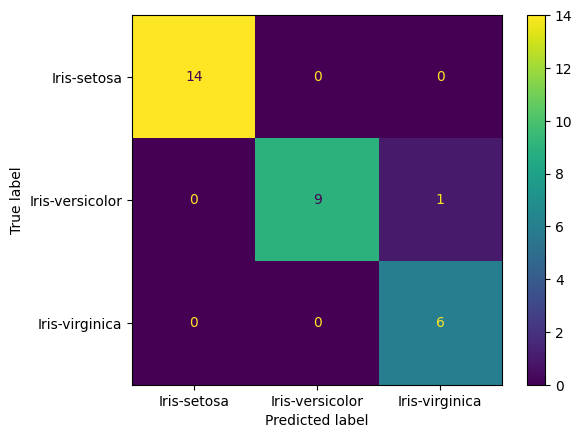

<class 'sklearn.tree._classes.DecisionTreeClassifier'>
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



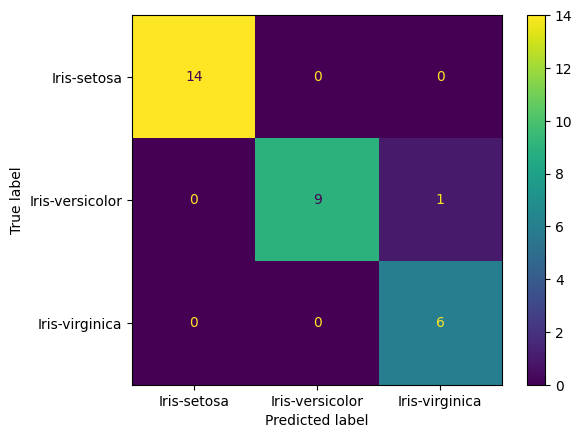

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



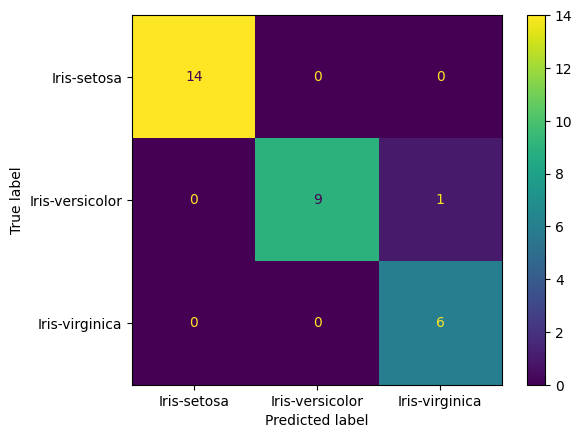

In [2]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import neighbors
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay  

def get_data ():
    df = pd.read_csv("data/IRIS.csv")
    df = df.sample(frac = 1)
    print(df.shape, df.columns)
    columns = list(df.columns)
    labels = df[columns[-1]].unique() 
    LAB = {labels[i]: i for i in range(0, len(labels)) }
    X = df[columns[:-1]].copy().to_numpy()
    labels  = df[columns[-1]].to_list()
    y = [LAB[lab] for lab in labels]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
    return X_train, y_train, X_test, y_test, LAB


if __name__ == "__main__":

    X_train, y_train, X_test, y_test, CLS  = get_data ()

    target_names = list (CLS.keys())

    models = [LogisticRegression()] 
    models.append (svm.SVC(kernel='poly', degree=8))
    models.append (GaussianNB())
    models.append (tree.DecisionTreeClassifier(criterion='entropy'))
    models.append (neighbors.KNeighborsClassifier(15, weights='uniform'))    

    for model in models:
        print(model.__class__)
        clf = model
        clf.fit(X_train, y_train)
        y_hat = clf.predict(X_test)
        
        print(classification_report(y_test, y_hat, target_names=target_names))
        
        CM = confusion_matrix(y_test, y_hat)
        cm_display = ConfusionMatrixDisplay(confusion_matrix = CM, display_labels = CLS)
        cm_display.plot()
        plt.show()
        
     
        print("========")